# Model Evaluation

## Objective
Evaluate and compare all trained models to select the best performer.

## Steps
1. Load all trained models (baseline and tuned)
2. Generate predictions on test set
3. Calculate comprehensive metrics
4. Visualize model comparisons
5. Analyze best model in detail
6. Feature importance analysis
7. Select final model for deployment

## Evaluation Metrics
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC Score
- Confusion Matrix
- Classification Report
- ROC Curves


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)


## 1. Load Data and Models


In [2]:
# Load test data
X_test = pd.read_csv('../data/processed/X_test.csv')
X_test_scaled = pd.read_csv('../data/processed/X_test_scaled.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Test set shape: {X_test.shape}")
print(f"Test target distribution:")
print(pd.Series(y_test).value_counts())
print(f"Test target percentages:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)

# Load saved results
baseline_results = pd.read_csv('../models/baseline_results.csv')
tuned_results = pd.read_csv('../models/tuned_results.csv')

print("\n" + "="*80)
print("BASELINE MODELS RESULTS")
print("="*80)
print(baseline_results.to_string(index=False))

print("\n" + "="*80)
print("TUNED MODELS RESULTS")
print("="*80)
print(tuned_results.to_string(index=False))


Test set shape: (2948, 53)
Test target distribution:
0    2653
1     295
Name: count, dtype: int64
Test target percentages:
0    89.993216
1    10.006784
Name: proportion, dtype: float64

BASELINE MODELS RESULTS
              Model  CV F1 Mean  CV F1 Std  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Logistic Regression    0.359670   0.007605       0.754071        0.245261     0.701695 0.363477      0.807484
      Decision Tree    0.327542   0.022632       0.845319        0.311475     0.450847 0.368421      0.676190
      Random Forest    0.326792   0.029311       0.877883        0.377358     0.338983 0.357143      0.795560
                KNN    0.321531   0.035893       0.904342        0.552846     0.230508 0.325359      0.762068

TUNED MODELS RESULTS
              Model  Best CV F1  Test Accuracy  Test Precision  Test Recall  Test F1  Test ROC-AUC
Logistic Regression    0.361733       0.757802        0.247286     0.694915 0.364769      0.806520
      Decision Tre

## 2. Visualize Baseline Model Performance


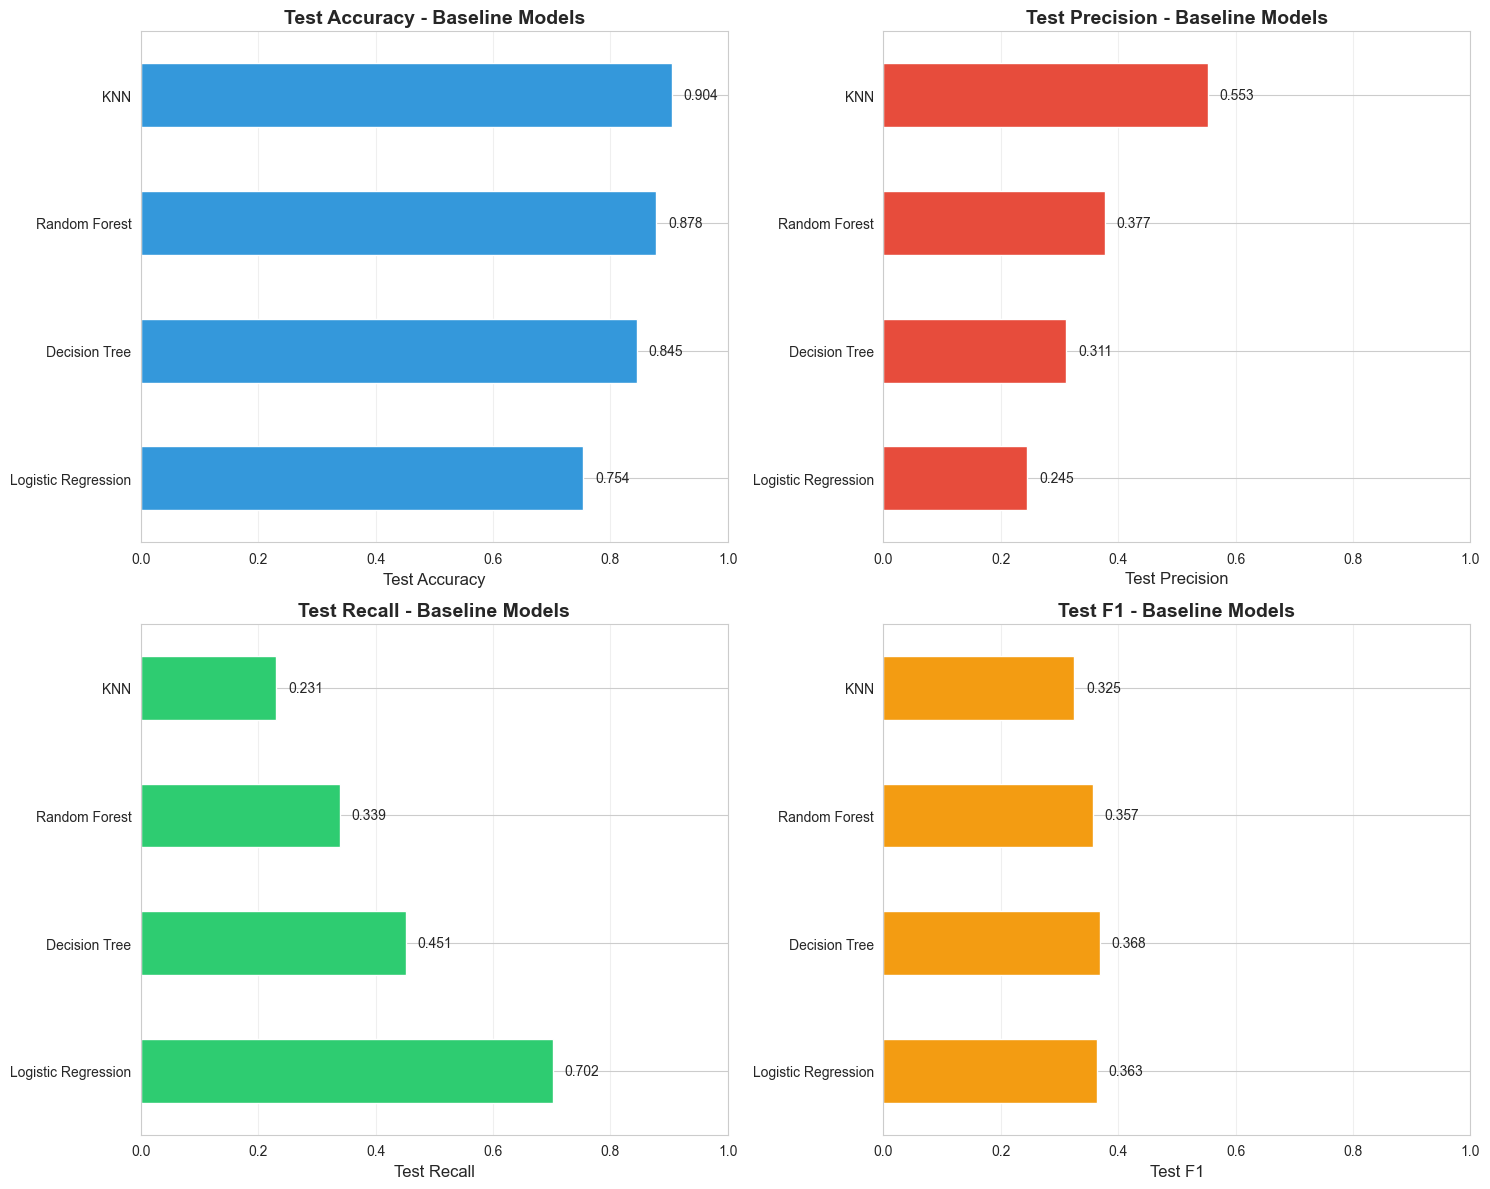

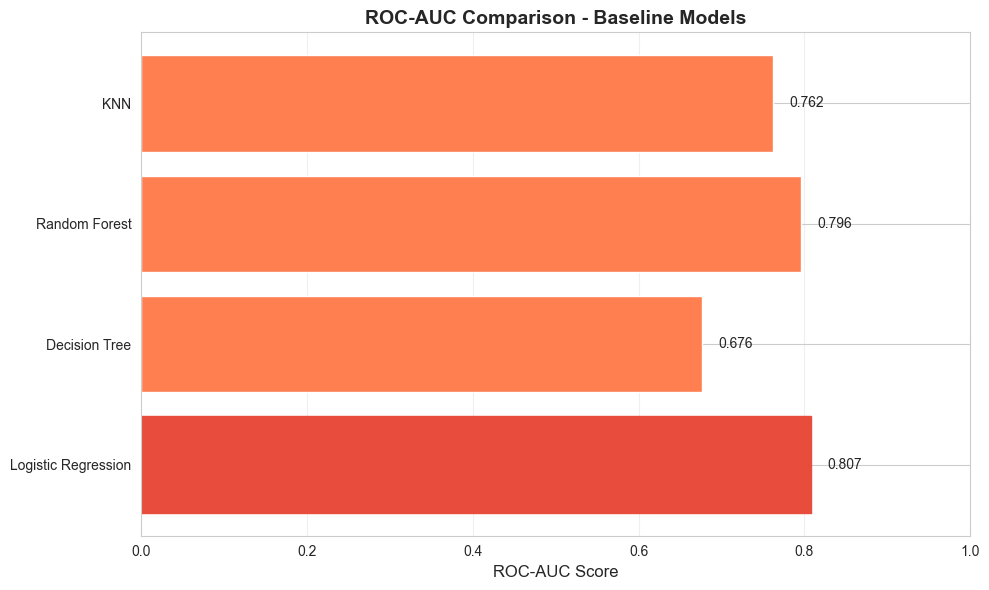

In [3]:
# Plot comparison of baseline models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    baseline_results.plot(x='Model', y=metric, kind='barh', ax=ax, legend=False, color=color)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('')
    ax.set_title(f'{metric} - Baseline Models', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(baseline_results[metric]):
        ax.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../models/baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC-AUC comparison for baseline
plt.figure(figsize=(10, 6))
bars = plt.barh(baseline_results['Model'], baseline_results['Test ROC-AUC'], color='coral')
plt.xlabel('ROC-AUC Score', fontsize=12)
plt.title('ROC-AUC Comparison - Baseline Models', fontsize=14, fontweight='bold')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)

# Highlight best
best_idx = baseline_results['Test ROC-AUC'].idxmax()
bars[best_idx].set_color('#e74c3c')

for i, v in enumerate(baseline_results['Test ROC-AUC']):
    plt.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../models/baseline_roc_auc.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Visualize Tuned Model Performance


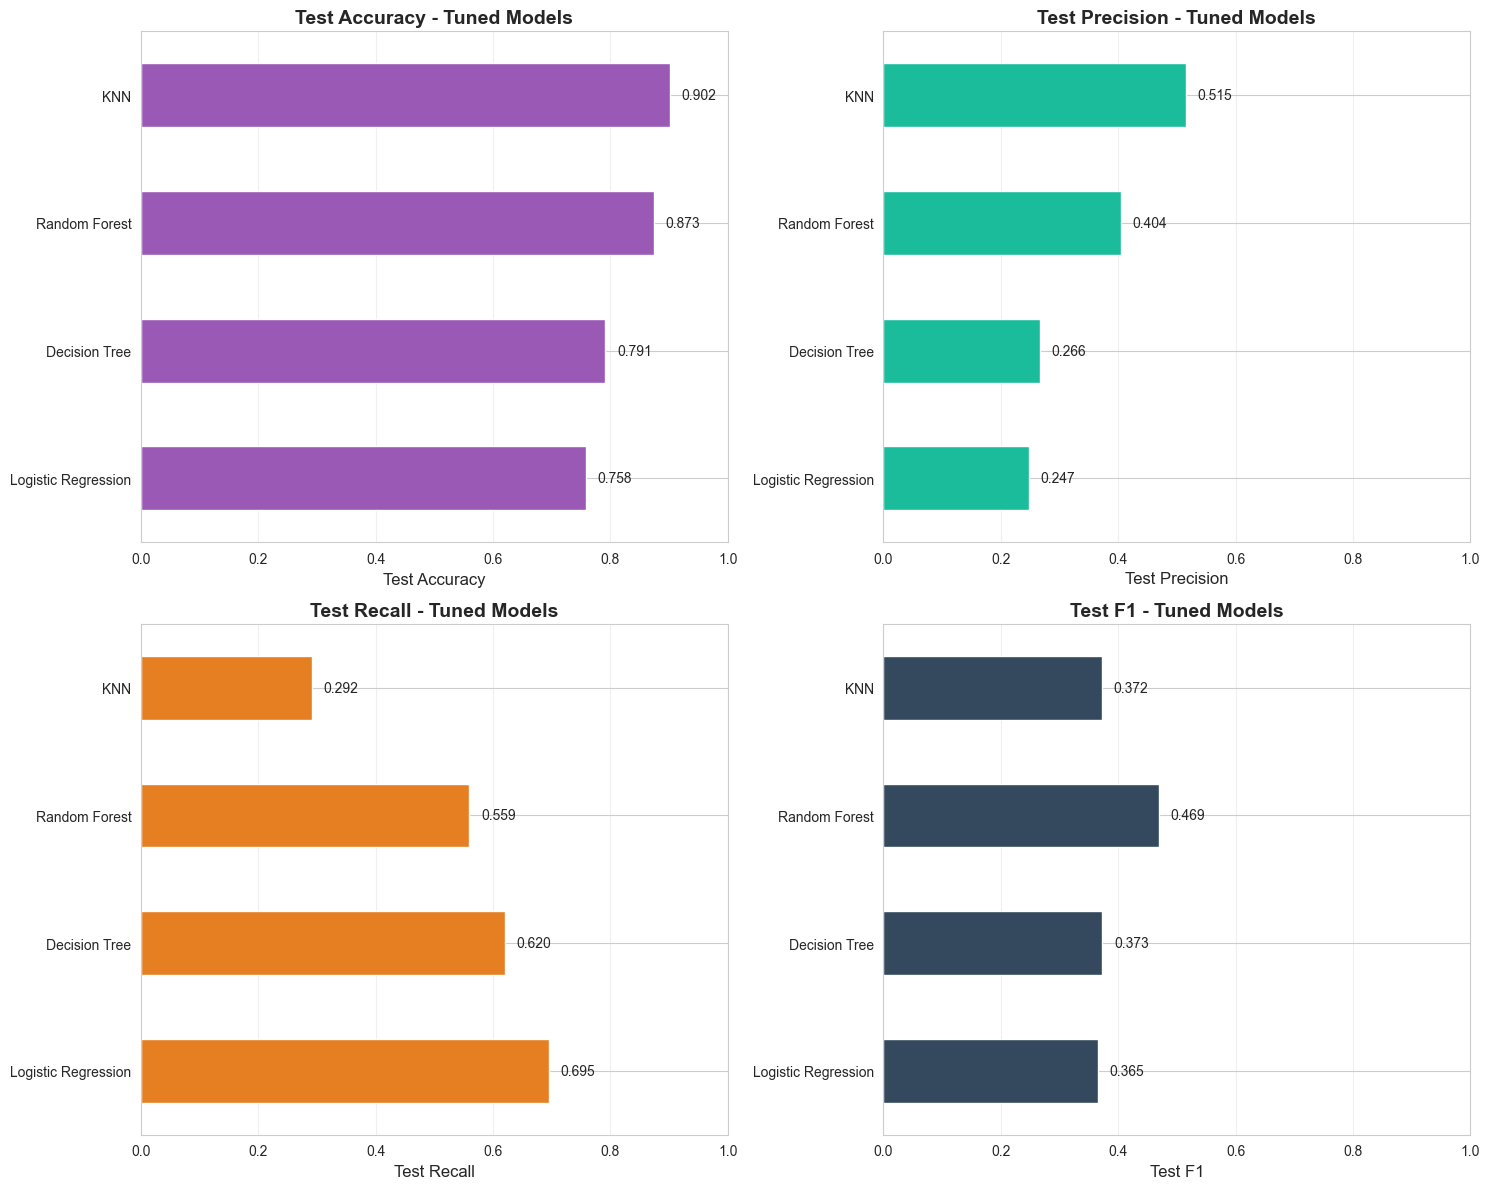

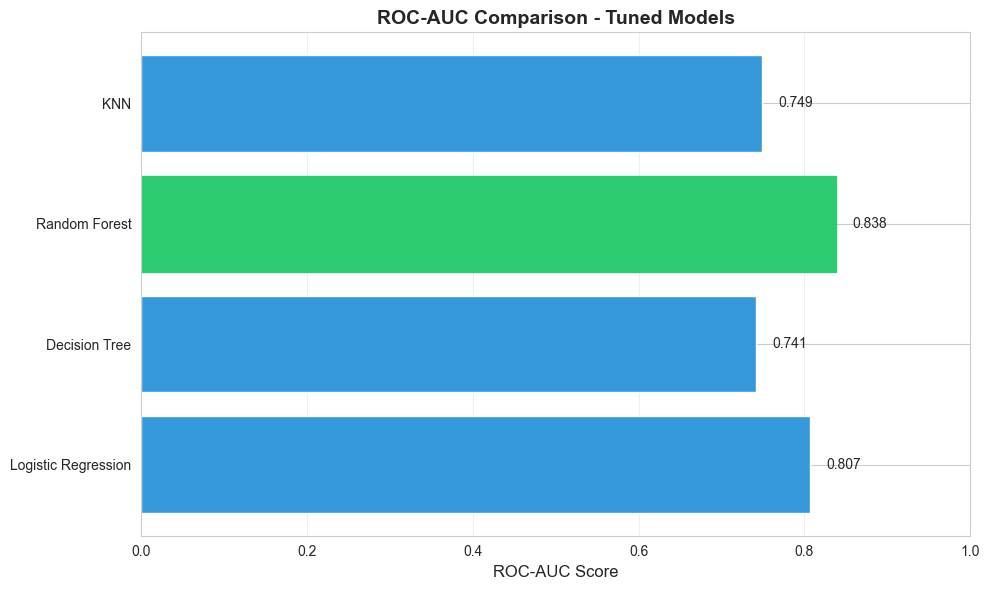

In [4]:
# Plot comparison of tuned models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']
colors = ['#9b59b6', '#1abc9c', '#e67e22', '#34495e']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    tuned_results.plot(x='Model', y=metric, kind='barh', ax=ax, legend=False, color=color)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('')
    ax.set_title(f'{metric} - Tuned Models', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, v in enumerate(tuned_results[metric]):
        ax.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../models/tuned_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC-AUC comparison for tuned
plt.figure(figsize=(10, 6))
bars = plt.barh(tuned_results['Model'], tuned_results['Test ROC-AUC'], color='#3498db')
plt.xlabel('ROC-AUC Score', fontsize=12)
plt.title('ROC-AUC Comparison - Tuned Models', fontsize=14, fontweight='bold')
plt.xlim([0, 1])
plt.grid(axis='x', alpha=0.3)

# Highlight best
best_idx = tuned_results['Test ROC-AUC'].idxmax()
bars[best_idx].set_color('#2ecc71')

for i, v in enumerate(tuned_results['Test ROC-AUC']):
    plt.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../models/tuned_roc_auc.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Compare Baseline vs Tuned Models


BASELINE VS TUNED COMPARISON
              Model  Test F1_Baseline  Test ROC-AUC_Baseline  Test F1_Tuned  Test ROC-AUC_Tuned  F1_Improvement  ROC_Improvement
Logistic Regression          0.363477               0.807484       0.364769            0.806520        0.001292        -0.000963
      Decision Tree          0.368421               0.676190       0.372709            0.741036        0.004288         0.064846
      Random Forest          0.357143               0.795560       0.469417            0.837756        0.112274         0.042196
                KNN          0.325359               0.762068       0.372294            0.748991        0.046936        -0.013077


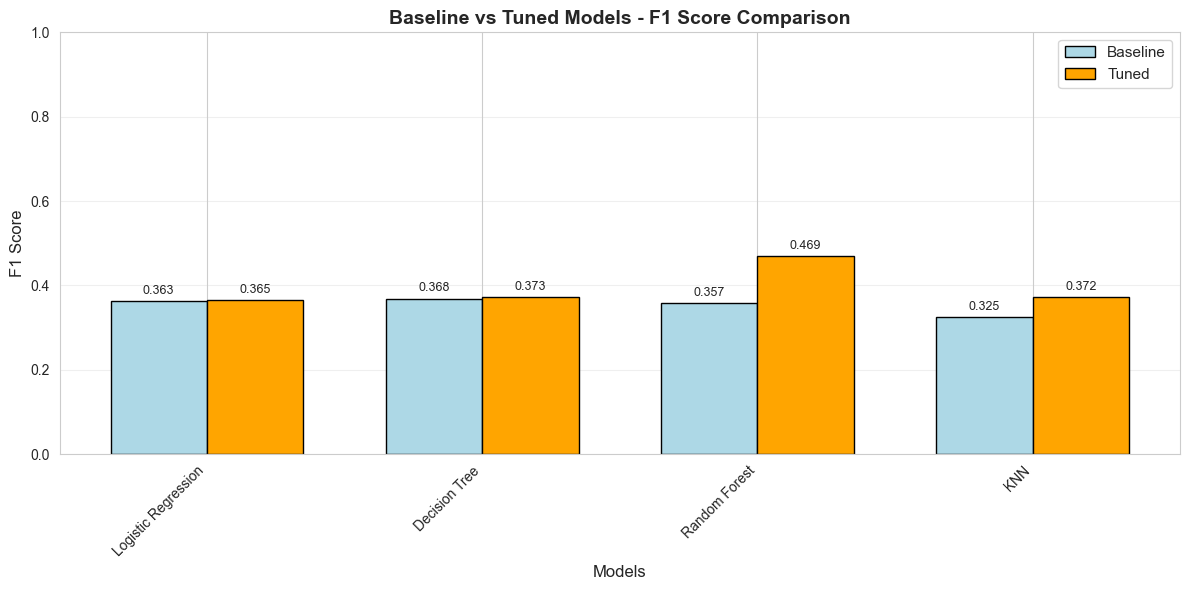

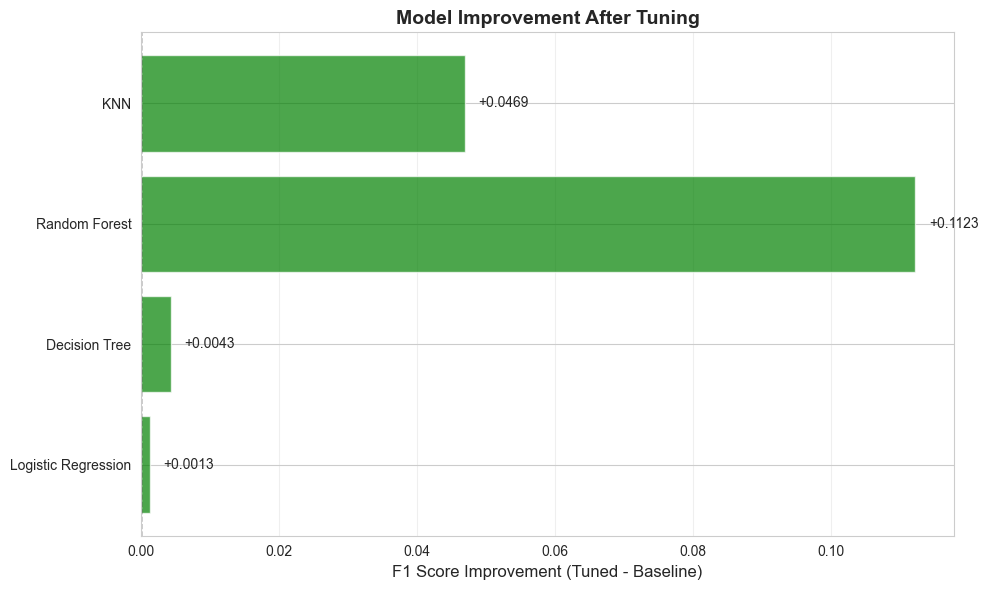

In [5]:
# Create comparison dataframe
comparison = baseline_results[['Model', 'Test F1', 'Test ROC-AUC']].merge(
    tuned_results[['Model', 'Test F1', 'Test ROC-AUC']],
    on='Model',
    suffixes=('_Baseline', '_Tuned')
)
comparison['F1_Improvement'] = comparison['Test F1_Tuned'] - comparison['Test F1_Baseline']
comparison['ROC_Improvement'] = comparison['Test ROC-AUC_Tuned'] - comparison['Test ROC-AUC_Baseline']

print("="*80)
print("BASELINE VS TUNED COMPARISON")
print("="*80)
print(comparison.to_string(index=False))

# Visualize F1 Score Comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison))
width = 0.35

bars1 = ax.bar(x - width/2, comparison['Test F1_Baseline'], width, label='Baseline', color='lightblue', edgecolor='black')
bars2 = ax.bar(x + width/2, comparison['Test F1_Tuned'], width, label='Tuned', color='orange', edgecolor='black')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('F1 Score', fontsize=12)
ax.set_title('Baseline vs Tuned Models - F1 Score Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison['Model'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../models/baseline_vs_tuned_f1.png', dpi=300, bbox_inches='tight')
plt.show()

# Improvement visualization
plt.figure(figsize=(10, 6))
colors_improvement = ['green' if x > 0 else 'red' for x in comparison['F1_Improvement']]
bars = plt.barh(comparison['Model'], comparison['F1_Improvement'], color=colors_improvement, alpha=0.7)
plt.xlabel('F1 Score Improvement (Tuned - Baseline)', fontsize=12)
plt.title('Model Improvement After Tuning', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(comparison['F1_Improvement']):
    plt.text(v + 0.002 if v > 0 else v - 0.002, i, f'{v:+.4f}',
             va='center', ha='left' if v > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig('../models/improvement_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Select and Analyze Best Model


In [6]:
# Select best model based on F1 score
best_model_row = tuned_results.loc[tuned_results['Test F1'].idxmax()]
best_model_name = best_model_row['Model']

print("="*80)
print("BEST MODEL SELECTION")
print("="*80)
print(f"Best Model: {best_model_name}")
print(f"Best CV F1: {best_model_row['Best CV F1']:.4f}")
print(f"Test Accuracy: {best_model_row['Test Accuracy']:.4f}")
print(f"Test Precision: {best_model_row['Test Precision']:.4f}")
print(f"Test Recall: {best_model_row['Test Recall']:.4f}")
print(f"Test F1: {best_model_row['Test F1']:.4f}")
print(f"Test ROC-AUC: {best_model_row['Test ROC-AUC']:.4f}")

# Load best model
safe_name = best_model_name.replace(' ', '_').lower()
best_model = joblib.load(f'../models/{safe_name}_tuned.pkl')

# Get appropriate test data
if best_model_name in ['Logistic Regression', 'KNN']:
    X_test_final = X_test_scaled
else:
    X_test_final = X_test

# Generate predictions
y_pred = best_model.predict(X_test_final)
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1] if hasattr(best_model, 'predict_proba') else y_pred


BEST MODEL SELECTION
Best Model: Random Forest
Best CV F1: 0.4472
Test Accuracy: 0.8735
Test Precision: 0.4044
Test Recall: 0.5593
Test F1: 0.4694
Test ROC-AUC: 0.8378


## 6. Confusion Matrix Analysis


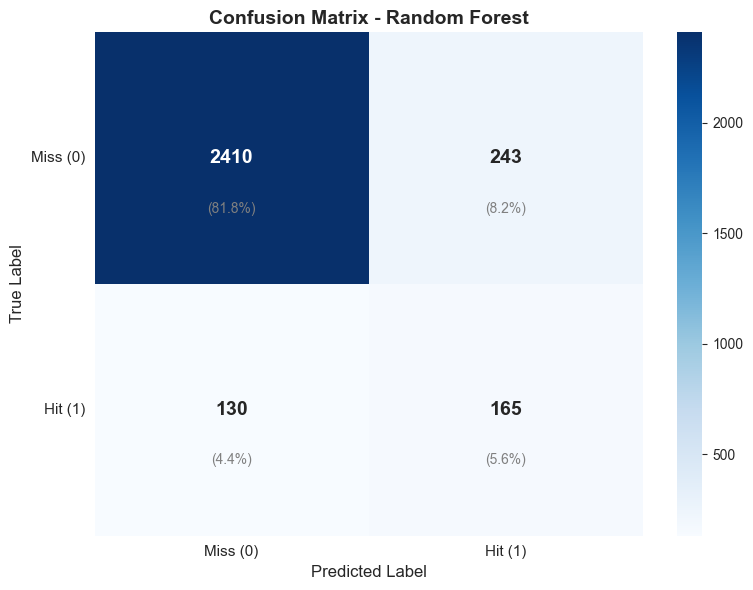


CONFUSION MATRIX ANALYSIS
True Negatives (TN): 2410 - Correctly predicted as Miss
False Positives (FP): 243 - Incorrectly predicted as Hit
False Negatives (FN): 130 - Incorrectly predicted as Miss
True Positives (TP): 165 - Correctly predicted as Hit

Miss Classification Accuracy: 90.84%
Hit Classification Accuracy: 55.93%


In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Miss (0)', 'Hit (1)'], fontsize=11)
plt.yticks([0.5, 1.5], ['Miss (0)', 'Hit (1)'], fontsize=11, rotation=0)

# Add percentage annotations
cm_percent = cm / cm.sum() * 100
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, f'({cm_percent[i,j]:.1f}%)',
                ha='center', va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.savefig('../models/best_model_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print confusion matrix details
print("\n" + "="*80)
print("CONFUSION MATRIX ANALYSIS")
print("="*80)
print(f"True Negatives (TN): {cm[0,0]} - Correctly predicted as Miss")
print(f"False Positives (FP): {cm[0,1]} - Incorrectly predicted as Hit")
print(f"False Negatives (FN): {cm[1,0]} - Incorrectly predicted as Miss")
print(f"True Positives (TP): {cm[1,1]} - Correctly predicted as Hit")
print(f"\nMiss Classification Accuracy: {cm[0,0]/(cm[0,0]+cm[0,1])*100:.2f}%")
print(f"Hit Classification Accuracy: {cm[1,1]/(cm[1,0]+cm[1,1])*100:.2f}%")


## 7. Classification Report


In [8]:
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred, target_names=['Miss (0)', 'Hit (1)'], digits=4))



CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Miss (0)     0.9488    0.9084    0.9282      2653
     Hit (1)     0.4044    0.5593    0.4694       295

    accuracy                         0.8735      2948
   macro avg     0.6766    0.7339    0.6988      2948
weighted avg     0.8943    0.8735    0.8823      2948



## 8. ROC Curve Analysis


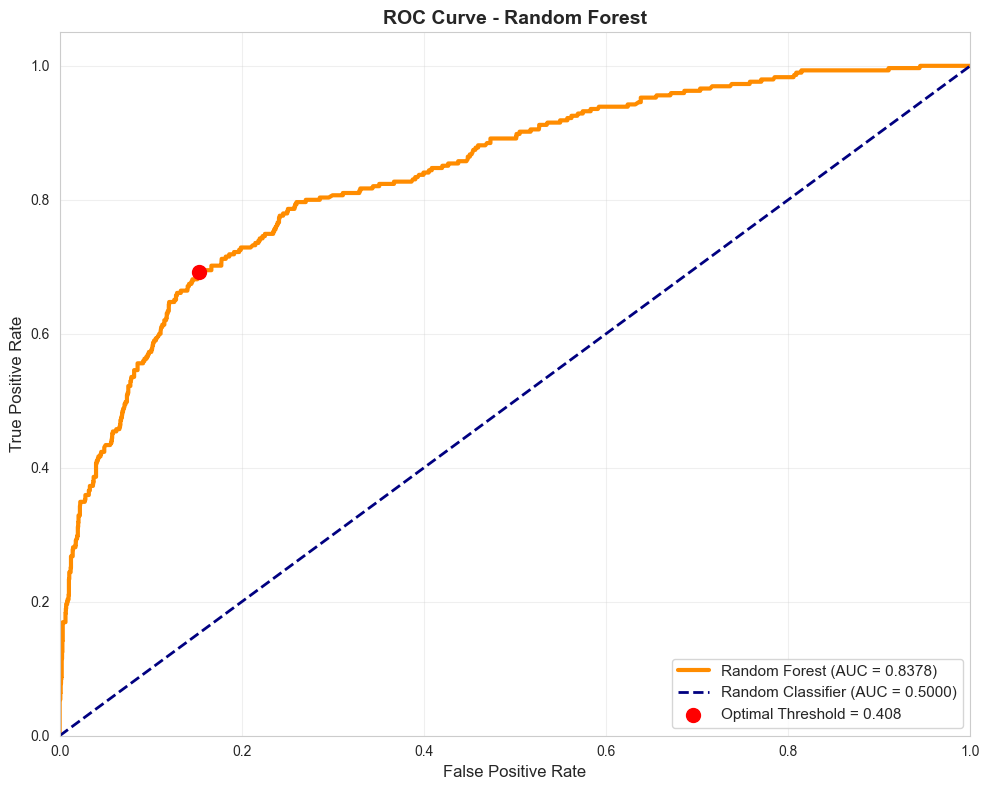


Optimal Threshold: 0.4075
At optimal threshold:
  - True Positive Rate (Recall): 0.6915
  - False Positive Rate: 0.1527


In [9]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'{best_model_name} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5000)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', s=100,
            label=f'Optimal Threshold = {optimal_threshold:.3f}', zorder=5)
plt.legend(loc="lower right", fontsize=11)

plt.tight_layout()
plt.savefig('../models/best_model_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"At optimal threshold:")
print(f"  - True Positive Rate (Recall): {tpr[optimal_idx]:.4f}")
print(f"  - False Positive Rate: {fpr[optimal_idx]:.4f}")


## 9. Compare All Models F1 Score Curves


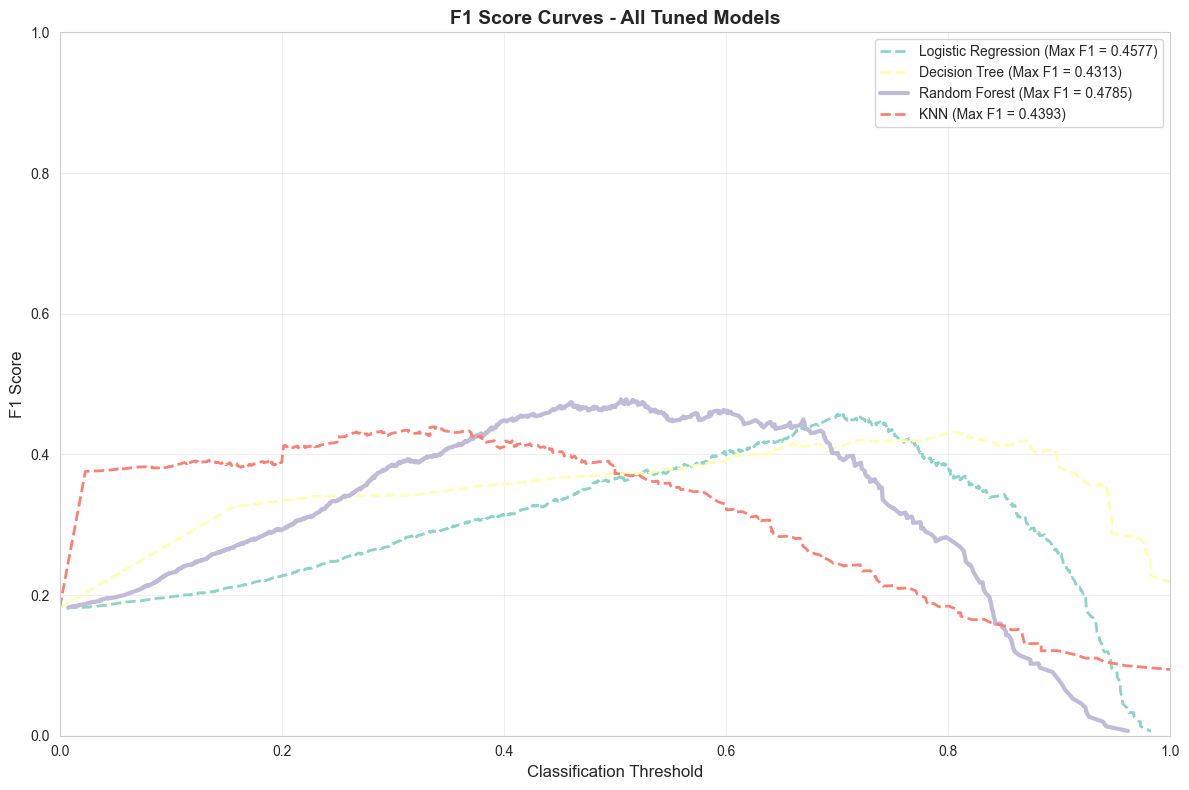

In [11]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

# Plot F1 score curve for each tuned model
for _, row in tuned_results.iterrows():
    model_name = row['Model']
    safe_name = model_name.replace(' ', '_').lower()

    # Load model
    model = joblib.load(f'../models/{safe_name}_tuned.pkl')

    # Get appropriate test data
    if model_name in ['Logistic Regression', 'KNN']:
        X_test_use = X_test_scaled
    else:
        X_test_use = X_test

    # Get predictions
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_use)[:, 1]
    else:
        y_proba = model.predict(X_test_use)

    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

    # Calculate F1 scores for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

    # Get max F1 score
    max_f1 = np.max(f1_scores)

    # Plot F1 score vs threshold
    linestyle = '-' if model_name == best_model_name else '--'
    linewidth = 3 if model_name == best_model_name else 2
    plt.plot(thresholds, f1_scores[:-1], lw=linewidth, linestyle=linestyle,
             label=f'{model_name} (Max F1 = {max_f1:.4f})')

plt.xlabel('Classification Threshold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score Curves - All Tuned Models', fontsize=14, fontweight='bold')
plt.legend(loc="best", fontsize=10)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.tight_layout()
plt.savefig('../models/all_models_f1_curves.png', dpi=300, bbox_inches='tight')
plt.show()


## 10. Feature Importance Analysis


TOP 20 MOST IMPORTANT FEATURES
                    Feature  Importance
               critic_score    0.187193
                   game_age    0.120764
               release_year    0.119255
           has_critic_score    0.068740
            publisher_Other    0.046392
                 console_PC    0.034787
                console_PS2    0.029032
            developer_Other    0.028775
              console_Other    0.026609
  publisher_Electronic Arts    0.023806
              genre_Shooter    0.023218
developer_Traveller's Tales    0.015251
               genre_Sports    0.015110
        publisher_EA Sports    0.012838
             genre_Strategy    0.011948
                console_PS3    0.011753
                 genre_Misc    0.011744
               console_X360    0.011643
               genre_Racing    0.011366
                console_PS4    0.010813


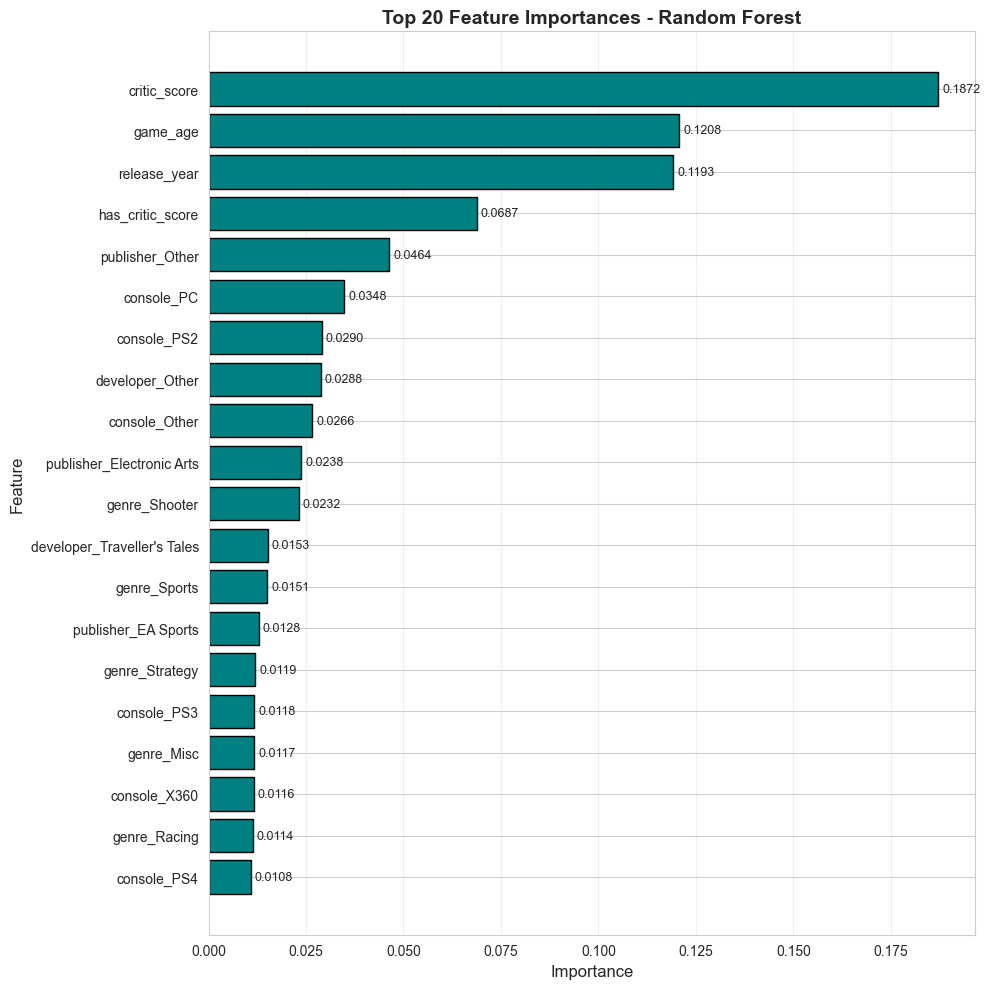


Full feature importance saved to: ../models/feature_importance.csv


In [11]:
if best_model_name in ['Decision Tree', 'Random Forest']:
    if hasattr(best_model, 'feature_importances_'):
        # Get feature importances
        importances = best_model.feature_importances_
        feature_names = X_test.columns

        # Create dataframe
        feature_imp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Print top 20
        print("="*80)
        print("TOP 20 MOST IMPORTANT FEATURES")
        print("="*80)
        print(feature_imp_df.head(20).to_string(index=False))

        # Plot top 20
        top_20 = feature_imp_df.head(20)
        plt.figure(figsize=(10, 10))
        plt.barh(top_20['Feature'], top_20['Importance'], color='teal', edgecolor='black')
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.title(f'Top 20 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)

        # Add value labels
        for i, v in enumerate(top_20['Importance']):
            plt.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

        plt.tight_layout()
        plt.savefig('../models/feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Save full feature importance
        feature_imp_df.to_csv('../models/feature_importance.csv', index=False)
        print("\nFull feature importance saved to: ../models/feature_importance.csv")

else:
    print(f"Feature importance not available for {best_model_name}")


## 11. Model Performance Summary


In [12]:
print("\n" + "="*80)
print("FINAL MODEL EVALUATION SUMMARY")
print("="*80)
print(f"\nBest Model: {best_model_name}")
print(f"Model saved at: ../models/{best_model_name.replace(' ', '_').lower()}_tuned.pkl")
print("\nPerformance Metrics:")
print(f"  - Accuracy:  {best_model_row['Test Accuracy']:.4f}")
print(f"  - Precision: {best_model_row['Test Precision']:.4f}")
print(f"  - Recall:    {best_model_row['Test Recall']:.4f}")
print(f"  - F1 Score:  {best_model_row['Test F1']:.4f}")
print(f"  - ROC-AUC:   {best_model_row['Test ROC-AUC']:.4f}")

print("\nKey Insights:")
print(f"  - The model correctly identifies {cm[1,1]} out of {cm[1,0]+cm[1,1]} hits ({cm[1,1]/(cm[1,0]+cm[1,1])*100:.1f}%)")
print(f"  - The model correctly identifies {cm[0,0]} out of {cm[0,0]+cm[0,1]} misses ({cm[0,0]/(cm[0,0]+cm[0,1])*100:.1f}%)")
print(f"  - ROC-AUC of {roc_auc:.4f} indicates {'good' if roc_auc > 0.75 else 'moderate' if roc_auc > 0.65 else 'fair'} discriminative ability")

if best_model_name in ['Decision Tree', 'Random Forest']:
    top_3_features = feature_imp_df.head(3)['Feature'].tolist()
    print(f"\nTop 3 Most Important Features:")
    for i, feat in enumerate(top_3_features, 1):
        importance = feature_imp_df[feature_imp_df['Feature'] == feat]['Importance'].values[0]
        print(f"  {i}. {feat} ({importance:.4f})")

print("\nAll evaluation plots saved to: ../models/")
print("\n" + "="*80)
print("EVALUATION COMPLETE")
print("="*80)
print("\nNext step: Run 5_deployment.ipynb to prepare model for deployment")




FINAL MODEL EVALUATION SUMMARY

Best Model: Random Forest
Model saved at: ../models/random_forest_tuned.pkl

Performance Metrics:
  - Accuracy:  0.8735
  - Precision: 0.4044
  - Recall:    0.5593
  - F1 Score:  0.4694
  - ROC-AUC:   0.8378

Key Insights:
  - The model correctly identifies 165 out of 295 hits (55.9%)
  - The model correctly identifies 2410 out of 2653 misses (90.8%)
  - ROC-AUC of 0.8378 indicates good discriminative ability

Top 3 Most Important Features:
  1. critic_score (0.1872)
  2. game_age (0.1208)
  3. release_year (0.1193)

All evaluation plots saved to: ../models/

EVALUATION COMPLETE

Next step: Run 5_deployment.ipynb to prepare model for deployment
